In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
project = pd.read_csv('G:\data sci\Mall_Customers.csv')
project.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
project.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Gender Comparison')

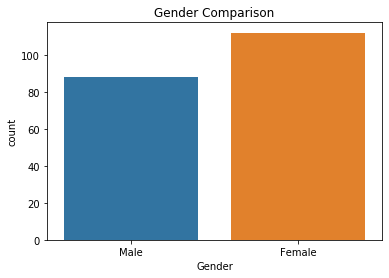

In [4]:
sns.countplot('Gender',data = project)
plt.title('Gender Comparison')

In [5]:
male_customers = project[project['Gender']== 'Male']
female_customers = project[project['Gender']=='Female']

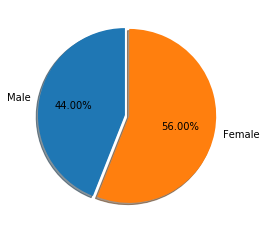

In [6]:
a = [len(male_customers),len(female_customers)]
labels = ['Male','Female']
plt.pie(a, labels = labels, radius = 1, autopct = '%0.2f%%', shadow = True, startangle=90, explode = [0,0.05])
plt.show()

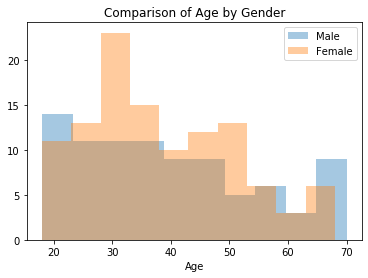

In [7]:
plt.hist('Age',data = project[project['Gender']=='Male'],alpha = 0.4,label = 'Male')
plt.hist('Age',data = project[project['Gender']=='Female'],alpha = 0.4,label = 'Female')
plt.title('Comparison of Age by Gender')
plt.xlabel('Age')
plt.legend()

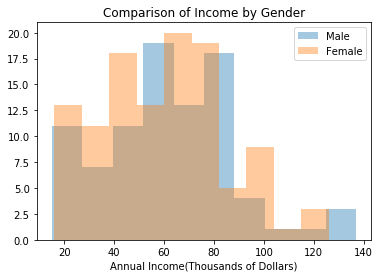

In [8]:
plt.hist('Annual Income (k$)',data = project[project['Gender']=='Male'],alpha = 0.4,label = 'Male')
plt.hist('Annual Income (k$)',data = project[project['Gender']=='Female'],alpha = 0.4,label = 'Female')
plt.title('Comparison of Income by Gender')
plt.xlabel('Annual Income(Thousands of Dollars)')
plt.legend()

Text(0.5, 0, 'Age')

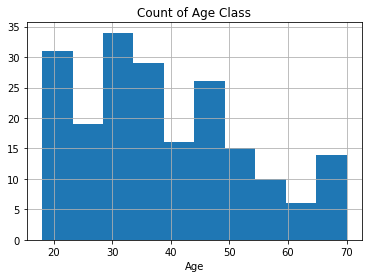

In [9]:
project.hist('Age')
plt.title('Count of Age Class')
plt.xlabel('Age')

Text(0.5, 0, 'Thousands of Dollars')

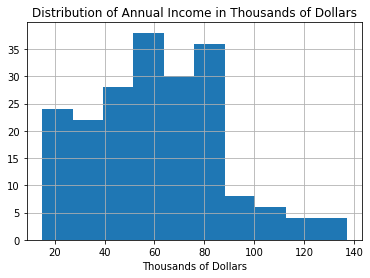

In [10]:
project.hist('Annual Income (k$)',bins = 10)
plt.title('Distribution of Annual Income in Thousands of Dollars')
plt.xlabel('Thousands of Dollars')

In [11]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    KM = KMeans(n_clusters=k)
    KM.fit(project[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(KM.inertia_)
sse

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30566.451130251862,
 24986.52564064288,
 21850.165282585633]

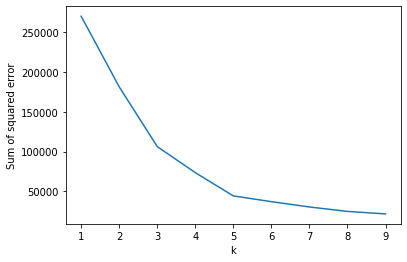

In [12]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [13]:
KM = KMeans(n_clusters=5, random_state=0)
KM

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
y_predicted = KM.fit_predict(project[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [15]:
project['cluster'] = y_predicted
project.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


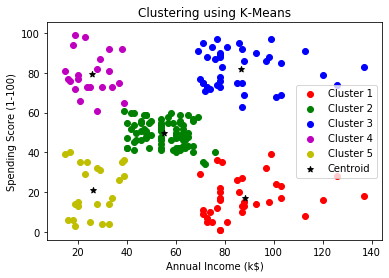

In [16]:
df1 = project[project.cluster==0]
df2 = project[project.cluster==1]
df3 = project[project.cluster==2]
df4 = project[project.cluster==3]
df5 = project[project.cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label = 'Cluster 1',color = 'r')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label = 'Cluster 2',color = 'g')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label = 'Cluster 3',color = 'b')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label = 'Cluster 4',color = 'm')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],label = 'Cluster 5',color = 'y')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color ="k", marker = "*",label = 'Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering using K-Means')
plt.legend()

Text(0.5, 1.0, 'Annual Income to Spending Score colored by Gender')

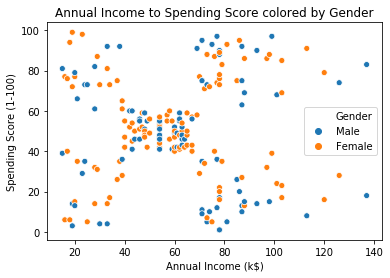

In [17]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',hue = 'Gender',data = project)
plt.title('Annual Income to Spending Score colored by Gender')